In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context='notebook', style='white', 
        font='sans-serif', font_scale=1., 
        rc={'figure.figsize':(8,5)})


## Read data

In [2]:
train_070 = pd.read_csv(os.path.join("..", "database_split", "train_0-70.csv"))
val_070 = pd.read_csv(os.path.join("..", "database_split", "val_0-70.csv"))
test_070 = pd.read_csv(os.path.join("..", "database_split", "test_0-70.csv"))

train_70100 = pd.read_csv(os.path.join("..", "database_split", "train_70-100.csv"))
val_70100 = pd.read_csv(os.path.join("..", "database_split", "val_70-100.csv"))
test_70100 = pd.read_csv(os.path.join("..", "database_split", "test_70-100.csv"))

In [3]:
# Unique train images
unique_070 = train_070.drop_duplicates('Subject ID')
print("0-70 - ", len(unique_070), "unique subjects")
unique_70100 = train_70100.drop_duplicates('Subject ID')
print("70-100 - ", len(unique_70100), "unique subjects")


0-70 -  573 unique subjects
70-100 -  224 unique subjects


In [4]:
train_070['unique'] = 'Longitudinal'
train_070.loc[unique_070.index, 'unique'] = 'Regular'
train_070['split'] = "20-70 years"

train_70100['unique'] = 'Longitudinal'
train_70100.loc[unique_70100.index, 'unique'] = 'Regular'
train_70100['split'] = ">70 years"
train = pd.concat([train_070, train_70100]).reset_index(drop=True)

train['database'] = train['Image Filename'].apply(lambda x: "ADNI" if 'ADNI' in x else 'IXI')

In [5]:
train.head()

,Subject ID,Age,Research Group,Image Filename,unique,split,database
0,141_S_6008,63.2,CN,141_S_6008_ADNI_Screening,Regular,20-70 years,ADNI
1,073_S_4552,63.2,CN,073_S_4552_ADNI2_Screening_MRI-New_Pt,Regular,20-70 years,ADNI
2,023_S_4448,64.4,CN,023_S_4448_ADNI2_Month_6-New_Pt,Regular,20-70 years,ADNI
3,137_S_4587,66.1,CN,137_S_4587_ADNI2_Month_3_MRI-New_Pt,Regular,20-70 years,ADNI
4,023_S_4448,68.1,CN,023_S_4448_ADNI2_Year_4_Visit,Longitudinal,20-70 years,ADNI


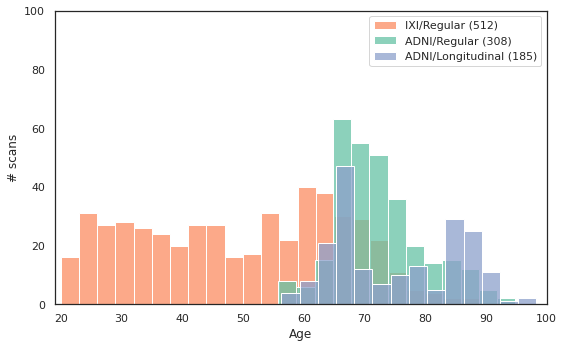

In [6]:
# W/ Data Augmentation
cmap = sns.color_palette('Set2')

fig = plt.figure()

ax1 = sns.histplot(data=train[(train.unique == 'Regular') &
                               (train.database == 'IXI')], x="Age",
                   label='IXI/Regular (512)', binwidth=3, color=cmap[1])
ax2 = sns.histplot(data=train[(train.unique == 'Regular') &
                               (train.database == 'ADNI')], x="Age",
                   label='ADNI/Regular (308)', binwidth=3, color=cmap[0])
ax3 = sns.histplot(data=train[train.unique == 'Longitudinal'], x="Age",
                   label='ADNI/Longitudinal (185)', binwidth=3, color=cmap[2])
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.xlim(19, 100)
plt.ylim(0, 100)
plt.legend()
ax3.set(ylabel='# scans', xlabel='Age')
fig.tight_layout()
# fig.savefig('Histogram_data_distribution.pdf', bbox_inches='tight', dpi=300)

In [43]:
# We applied four DataAugmentations
_train = train.copy()
train_aug = _train.copy()
for transf in ['bf', 'noise', 'trans', 'rot']:
    _train['unique'] = 'Data Augmentation'
    train_aug = pd.concat([train_aug, _train])

age_interval = train_aug[((train_aug.Age>=58) & (train_aug.Age<70)) & (train_aug.unique == 'Data Augmentation')].drop_duplicates(subset=['Image Filename'])
age_interval2 = train_aug[((train_aug.Age>=58) & (train_aug.Age<70)) & (train_aug.unique != 'Data Augmentation')]
age_interval = pd.concat([age_interval, age_interval2]).reset_index(drop=True)
train_aug = train_aug[~((train_aug.Age>=58) & (train_aug.Age<70))]
train_aug = pd.concat([train_aug, age_interval]).reset_index(drop=True)
train_aug.unique.value_counts()


Data Augmentation    2897
Regular               797
Longitudinal          195
Name: unique, dtype: int64

/home/kpoloni/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x360 with 0 Axes>

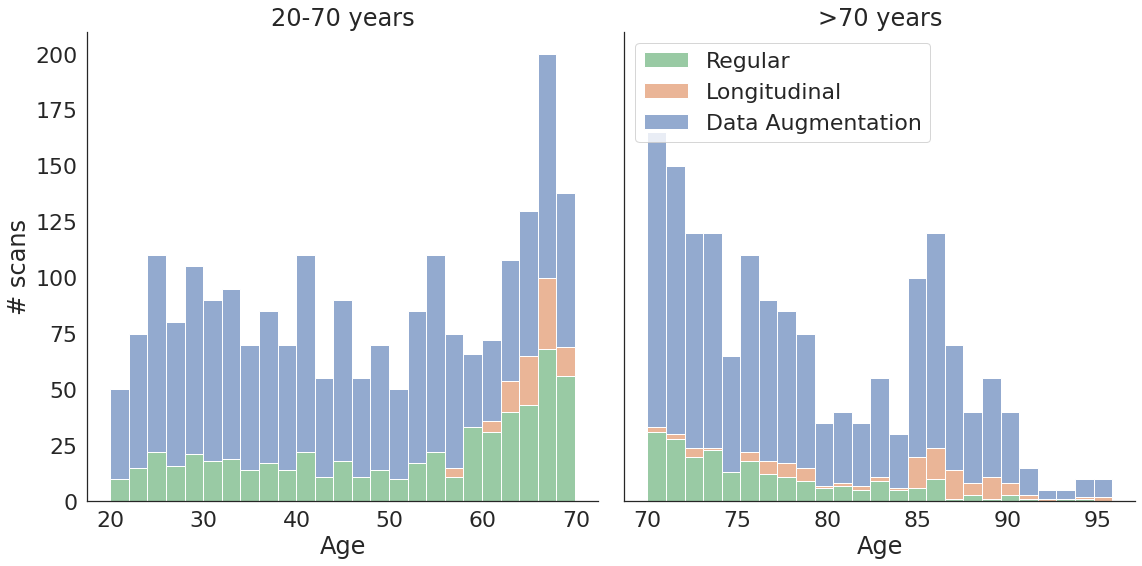

In [49]:
sns.set(context='notebook', style='white', 
        font='sans-serif', font_scale=2., 
        rc={'figure.figsize':(8,5)})


fig = plt.figure()
g = sns.FacetGrid(train_aug, col="split", sharex=False, height=5, size=8, palette=sns.color_palette('Set2'))
g.map_dataframe(sns.histplot, x="Age", alpha=.6, hue='unique', hue_order=['Data Augmentation', 'Longitudinal','Regular'], multiple='stack', element='bars', common_bins=True, bins=25, label='Data') 
g.set_xlabels("Age")
g.set_ylabels("# scans")
g.set_titles("{col_name}")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Regular', 'Longitudinal', 'Data Augmentation']
order = [0, 1, 2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left')
# plt.legend()
# plt.savefig('Histogram_data_augmentation_distribution2.pdf', bbox_inches='tight', dpi=300)


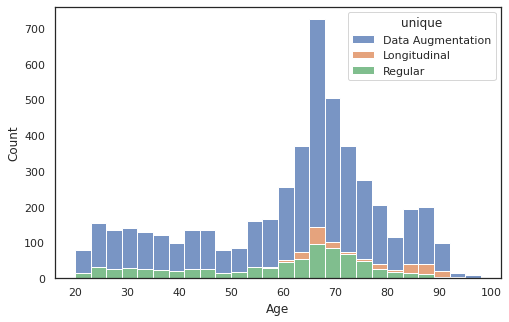

In [8]:
sns.set(context='notebook', style='white', 
        font='sans-serif', font_scale=1., 
        rc={'figure.figsize':(8,5)})

cmap = sns.color_palette('Set2')
fig = plt.figure()
ax1 = sns.histplot(data=train_aug, x="Age", binwidth=3, color=cmap[0], hue='unique', hue_order=['Data Augmentation', 'Longitudinal', 'Regular'], multiple='stack')

In [99]:
# We applied four DataAugmentations
_train = train.copy()
_train['DataAug'] = 'None'
train_aug = _train.copy()
for transf in ['bf', 'noise', 'trans', 'rot']:
    _train['DataAug'] = transf
    train_aug = pd.concat([train_aug, _train])
train_aug.DataAug.value_counts()

noise    943
trans    943
None     943
rot      943
bf       943
Name: DataAug, dtype: int64

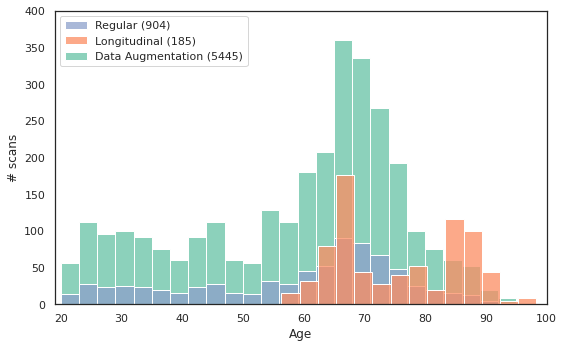

In [102]:
# W/ Data Augmentation
cmap = sns.color_palette('Set2')
sns.set(context='notebook', style='white', 
        font='sans-serif', font_scale=1., 
        rc={'figure.figsize':(8,5)})

fig = plt.figure()

ax1 = sns.histplot(data=train_aug[(train_aug.unique == 'Regular') &
                                  (train_aug.DataAug != 'None')], x="Age",
                   label='Data Augmentation (5445)', binwidth=3, color=cmap[0])

ax3 = sns.histplot(data=train_aug[(train_aug.unique == 'Regular') &
                                  (train_aug.DataAug == 'None')], x="Age",
                   label='Regular (904)', binwidth=3, color=cmap[2])
                   
ax2 = sns.histplot(data=train_aug[(train_aug.unique == 'Longitudinal') &
                                  (train_aug.DataAug != 'None')], x="Age",
                   label='Longitudinal (185)', binwidth=3, color=cmap[1])



handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.xlim(19, 100)
plt.ylim(0, 400)
# plt.legend()
ax3.set(ylabel='# scans', xlabel='Age')
fig.tight_layout()
# fig.savefig('Histogram_data_augmentation_distribution.pdf', bbox_inches='tight', dpi=300)